In [ ]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
#       to predcit the closing stock price of a corporation (Apple) using last 60 days stock price.

In [32]:
# import stuff
import math
# import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# from google.colab import files

In [11]:
#Get the stock quote
df = pd.read_csv('AAPL.csv', index_col=False)
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

# show data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2012-01-03,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.610316,302220800
2012-01-04,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.678085,260022000
2012-01-05,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.818839,271269600
2012-01-06,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.952843,318292800
2012-01-09,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.932296,394024400
...,...,...,...,...,...,...,...
2019-12-10,2019-12-10,67.150002,67.517502,66.464996,67.120003,66.234116,90420400
2019-12-11,2019-12-11,67.202499,67.775002,67.125000,67.692497,66.799049,78756800
2019-12-12,2019-12-12,66.945000,68.139999,66.830002,67.864998,66.969292,137310400
2019-12-13,2019-12-13,67.864998,68.824997,67.732498,68.787498,67.879601,133587600


In [12]:
df.shape

(2002, 7)

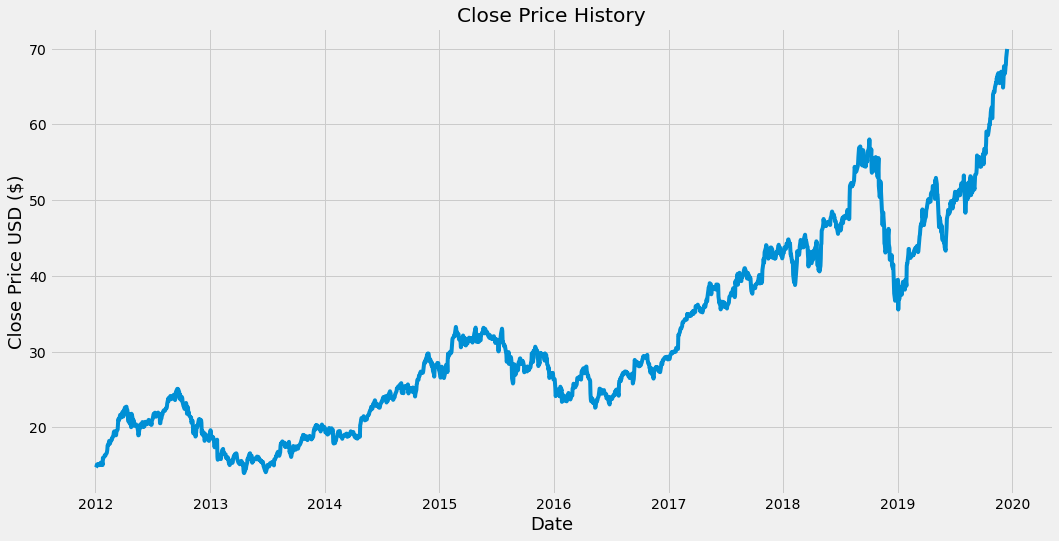

In [13]:
#Visualize closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [14]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Conver the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1602

In [15]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01319741],
       [0.0146064 ],
       [0.01753279],
       ...,
       [0.96251175],
       [0.97897982],
       [1.        ]])

In [16]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01319741, 0.0146064 , 0.01753279, 0.0203189 , 0.01989175,
       0.02085445, 0.02041453, 0.01967498, 0.01866763, 0.02178528,
       0.0245969 , 0.02372984, 0.01898003, 0.02351306, 0.01905017,
       0.03578602, 0.03449178, 0.0361813 , 0.03983448, 0.04204679,
       0.04186192, 0.04117974, 0.04408699, 0.04682209, 0.04992064,
       0.05492545, 0.06543873, 0.06559813, 0.07145091, 0.07582452,
       0.06830777, 0.07120224, 0.07114488, 0.07926097, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.09236911, 0.0968511 ,
       0.09814534, 0.09859803, 0.09093463, 0.08908568, 0.08935985,
       0.09656424, 0.09859166, 0.10294618, 0.11321081, 0.12690551,
       0.12434253, 0.1243489 , 0.13425015, 0.1373487 , 0.13514272,
       0.13312807, 0.13103049, 0.13799896, 0.14278066, 0.14478259])]
[0.13983513293775218]

[array([0.01319741, 0.0146064 , 0.01753279, 0.0203189 , 0.01989175,
       0.02085445, 0.02041453, 0.01967498, 0.01866763, 0.02178528,
       0.0245969 , 0.02372984, 0.01

In [17]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [19]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

2021-10-19 18:10:43.019633: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2021-10-19 18:11:00.165234: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1542/1542 [==============================] - 60s 37ms/step - loss: 6.8026e-04


In [22]:
# Create testing data set
#Crate a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [23]:
#Convert the data to a numpy array
x_test = np.array(x_test)


In [24]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [25]:
#Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [26]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.5397462925640871

/var/folders/f9/p89fk9sn7f5_lpw1k9lknj7m0000gp/T/ipykernel_70332/586142526.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


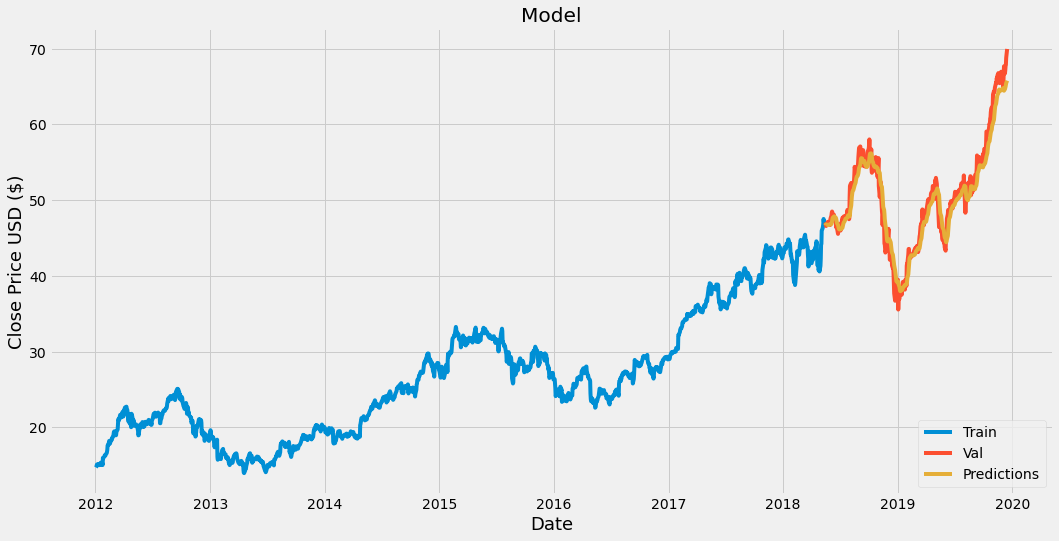

In [27]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [28]:
#Show the valid and predicted prices
valid

,Close,Predictions
2018-05-16,47.044998,46.642475
2018-05-17,46.747501,46.754131
2018-05-18,46.577499,46.786560
2018-05-21,46.907501,46.755714
2018-05-22,46.790001,46.736759
...,...,...
2019-12-10,67.120003,64.811577
2019-12-11,67.692497,64.985420
2019-12-12,67.864998,65.212181
2019-12-13,68.787498,65.451736


In [29]:
#Get the quote
# apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = df.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and ...
last_60_days_scaled = scaler.transform(last_60_days)
#Create empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[66.24476]]
